In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
sampled_df = pd.read_csv('sampled_df.csv')

In [12]:
sampled_df = sampled_df[['v_call_heavy', 'd_call_heavy', 'j_call_heavy', 'sequence_alignment_aa_light', 'sequence_alignment_aa_heavy', 'ANARCI_status_light', 'ANARCI_status_heavy']]

In [13]:
sampled_df

,v_call_heavy,d_call_heavy,j_call_heavy,sequence_alignment_aa_light,sequence_alignment_aa_heavy,ANARCI_status_light,ANARCI_status_heavy
0,IGHV3-21*02,IGHD5-12*01,IGHJ6*02,DIQVTQSPSSLSAFVGDRVTITCRASESINMYLNWYQQKPGKAPKL...,EIQLVESGGGLVKPGGSLRLSCGASGFTFSYFTMNWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
1,IGHV1-46*01,IGHD1-26*01,IGHJ4*02,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||"
2,IGHV1-3*01,IGHD2-2*01,IGHJ4*02,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKV...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,|||||,"|Deletions: 10, 73||||"
3,IGHV3-7*03,IGHD6-13*01,IGHJ5*02,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNEKNYLAWYQQKP...,EVQLVESGGGLVQPGESMRLSCAASGFAFSDAWMTWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
4,IGHV3-9*01,IGHD5-18*01,IGHJ4*02,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
5,IGHV3-33*01,IGHD2-8*01,IGHJ4*02,DIQMTQSPSSLSASVGDRVTITCRASQGTGNYLAWYQQKAGKVPKL...,QVQLMESGGGVVQPGRSLKLSCAASGFTFSSHGMYWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
6,IGHV3-33*08,IGHD7-27*01,IGHJ6*03,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||"
7,IGHV1-2*04,IGHD5-18*01,IGHJ4*02,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||"
8,IGHV3-74*01,IGHD6-19*01,IGHJ4*02,DTVMTQTPLSSRVTLGQPASISCRSSQSLEHSDGHTYLNWLHQRPG...,EVQLVESGGGLVQPGGSLRLSCAASGFTYSSYWMYWVRQAPGEGLV...,|||||,"|Deletions: 10, 73||||"
9,IGHV4-61*02,IGHD2-8*01,IGHJ4*02,DIQMAQSPSSLSASVGDRVSVTCRASQSISSYFNWYQQKPGQAPKL...,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGDYYWSWVRQPAGKG...,|||||,"|Deletions: 10, 73||||"


one hot encode

In [14]:
def one_hot_encode_seq(df, column):
    #Output a df with a specific columns that want to get dummies in
    
    #label_encode
    le = LabelEncoder()
    le.fit(df[column])
    integer_encoded_letters_arry = le.transform(df[column])
    
    #append
    integer_encoded_letters_series = pd.Series(integer_encoded_letters_arry)
    df['integer_encoded_letters'] = integer_encoded_letters_series
    
    #one hot encode
    df_dummies = pd.get_dummies(df, prefix = ['integer_encoded_letters'], columns = ['integer_encoded_letters'], drop_first = True)
    return df_dummies

In [15]:
alph = np.array(sorted('ACDEFGHIKLMNPQRSTVWY'))
residue_info = pd.read_csv("residue_dict_copy.csv", header = 0, index_col = 0)
def physchemvh_gen(df, column):
    res_counts = pd.DataFrame(index = alph)
    df = df.set_index(column)
    for i in df.index:
        characters = pd.Series(list(i))
        res_counts = pd.concat([res_counts, characters.value_counts()], axis = 1, ignore_index = False)
    res_counts.fillna(0, inplace = True)
    res_counts = res_counts.T
    hydrophobicity = []    
    for column in res_counts:
        hydros = []
        for index, row in res_counts.iterrows():
            hydros.append(row[column]*residue_info.loc[column, 'Hydropathy Score'])
        hydrophobicity.append(hydros)
    hydrophobicity = pd.DataFrame(hydrophobicity).T
    hydrophobicity['ave'] = hydrophobicity.sum(axis = 1)/115
    res_counts['Hydro'] = res_counts['A'] +  res_counts['I'] +  res_counts['L']+  res_counts['F']+  res_counts['V']
    res_counts['Amph'] = res_counts['W'] +  res_counts['Y']+  res_counts['M']
    res_counts['Polar'] = res_counts['Q'] +  res_counts['N'] + res_counts['S'] +  res_counts['T'] +  res_counts['C']+  res_counts['M']
    res_counts['Charged'] =  res_counts['R'] +  res_counts['K'] + res_counts['D'] +  res_counts['E'] +  res_counts['H']
    res_counts.reset_index(drop = True, inplace = True)
    physchemvh = pd.concat([res_counts, hydrophobicity['ave']], axis = 1, ignore_index = False)
    return physchemvh

In [16]:
#heavy
X_heavy = physchemvh_gen(sampled_df, 'sequence_alignment_aa_heavy')

In [17]:
#light
X_light = physchemvh_gen(sampled_df, 'sequence_alignment_aa_light')

In [18]:
#normalization

def normalize(df):
    for i in df:
        df[i] = (df[i] - df[i].min())/ (df[i].max() - df[i].min())
    return df

In [19]:
X_heavy_normalize = normalize(X_heavy)
X_heavy_normalize

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,0.666667,0.0,0.4,0.666667,0.833333,1.000000,0.000000,0.666667,0.166667,0.428571,...,0.818182,0.250000,0.0,0.00,0.571429,0.750000,0.444444,0.692308,0.454545,0.743191
1,0.500000,0.5,0.2,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.285714,...,0.545455,0.500000,0.8,0.00,0.571429,0.500000,0.555556,0.846154,0.181818,0.970817
2,0.833333,1.0,0.2,0.500000,0.333333,0.333333,0.333333,0.166667,0.833333,0.142857,...,0.363636,0.416667,0.4,0.25,0.428571,0.333333,0.444444,0.769231,0.545455,0.379377
3,1.000000,0.0,1.0,0.666667,0.500000,0.777778,0.000000,0.166667,0.833333,0.428571,...,0.272727,0.083333,0.4,0.50,0.142857,0.666667,0.333333,0.000000,1.000000,0.398833
4,1.000000,0.0,1.0,0.333333,0.500000,0.888889,0.333333,0.333333,0.500000,0.714286,...,0.363636,0.000000,0.0,0.50,0.000000,0.750000,0.222222,0.076923,0.727273,0.675097
5,0.333333,0.0,0.4,0.333333,0.500000,0.666667,0.333333,0.333333,0.666667,0.571429,...,0.181818,0.250000,0.6,0.25,0.714286,0.583333,0.666667,0.307692,0.454545,0.682879
6,0.500000,0.0,0.4,0.166667,0.333333,0.666667,0.666667,0.166667,0.666667,0.428571,...,0.363636,0.083333,1.0,0.50,1.000000,0.583333,1.000000,0.230769,0.545455,0.579767
7,0.500000,0.0,0.2,0.500000,0.166667,0.555556,0.333333,0.166667,0.666667,0.000000,...,0.181818,0.416667,0.4,0.50,0.857143,0.000000,1.000000,0.538462,0.545455,0.000000
8,0.333333,0.0,0.2,0.666667,0.166667,0.888889,0.000000,0.333333,0.000000,0.571429,...,0.545455,0.000000,1.0,0.75,0.571429,0.583333,0.666667,0.153846,0.181818,1.000000
9,0.166667,0.0,0.0,0.166667,0.166667,0.666667,0.333333,0.166667,0.333333,0.714286,...,1.000000,0.416667,0.8,0.25,0.428571,0.416667,0.222222,1.000000,0.000000,0.678988


In [20]:
X_light_normalize = normalize(X_light)

In [21]:
#find the best clustering


def best_num_cluster(X, elbow = True, silhouette = True):
    #Elbow Method
    if elbow == True:
        Sum_of_squared_distances = []
        K = range(1,len(X) + 1)
        for num_clusters in K :
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(X)
            Sum_of_squared_distances.append(kmeans.inertia_)
        plt.plot(K,Sum_of_squared_distances,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Sum of squared distances/Inertia') 
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    if silhouette == True:
        #Silhouette
        range_n_clusters = range(2, len(X))
        silhouette_avg = []
        for num_clusters in range_n_clusters:
             # initialise kmeans
            kmeans = KMeans(n_clusters=num_clusters)
            kmeans.fit(X)
            cluster_labels = kmeans.labels_

            # silhouette score
            silhouette_avg.append(silhouette_score(X, cluster_labels))
        plt.plot(range_n_clusters,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.title('Silhouette analysis For Optimal k')
        plt.show()

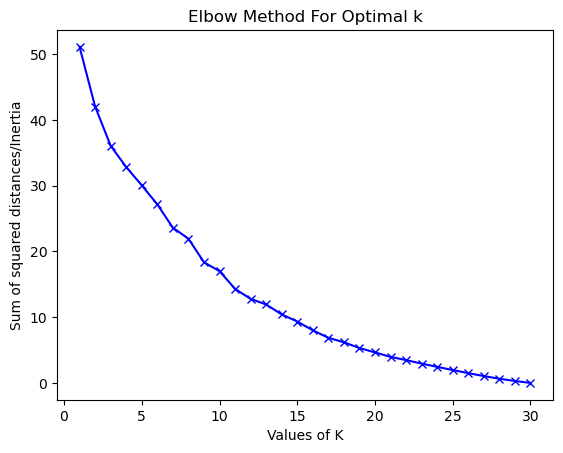

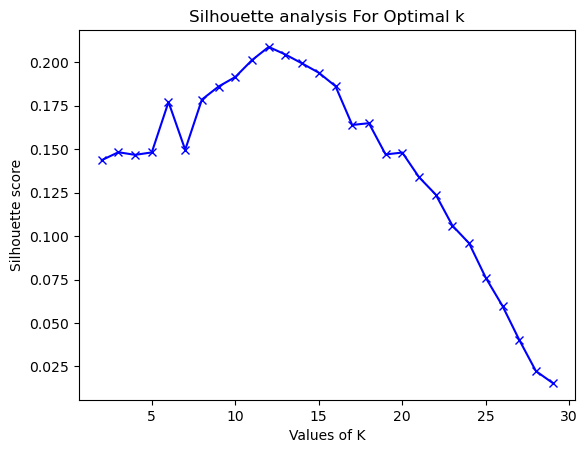

In [22]:
#best number of cluster for heavy
best_num_cluster(X_heavy_normalize)

/var/folders/bv/tmh37l310r19rd6vw0yt6xrc0000gn/T/ipykernel_62541/1676613064.py:11: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  kmeans.fit(X)


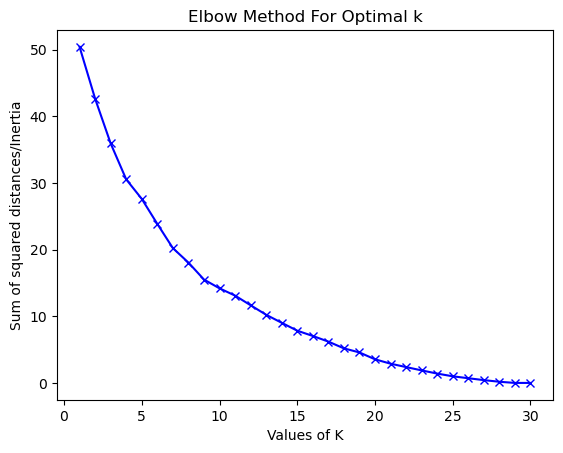

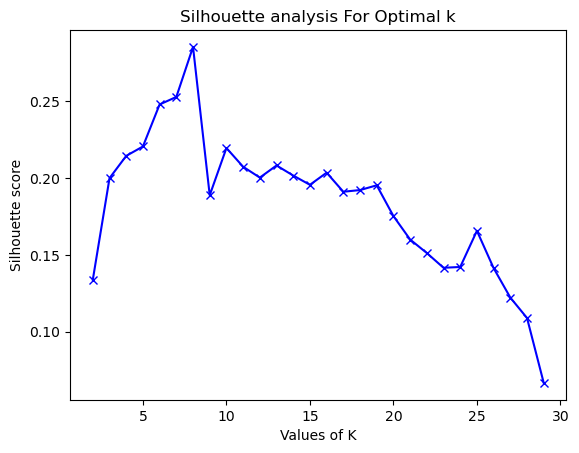

In [23]:
#best number of cluster for heavy
best_num_cluster(X_light_normalize)

In [24]:
#best cluster for heavy == 9
kmeans_1 = KMeans(n_clusters=9).fit(X_heavy_normalize)
cluster_labels = kmeans_1.labels_
X_heavy_normalize['cluster'] = cluster_labels
X_heavy_normalize

,A,C,D,E,F,G,H,I,K,L,...,T,V,W,Y,Hydro,Amph,Polar,Charged,ave,cluster
0,0.666667,0.0,0.4,0.666667,0.833333,1.000000,0.000000,0.666667,0.166667,0.428571,...,0.250000,0.0,0.00,0.571429,0.750000,0.444444,0.692308,0.454545,0.743191,0
1,0.500000,0.5,0.2,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.285714,...,0.500000,0.8,0.00,0.571429,0.500000,0.555556,0.846154,0.181818,0.970817,8
2,0.833333,1.0,0.2,0.500000,0.333333,0.333333,0.333333,0.166667,0.833333,0.142857,...,0.416667,0.4,0.25,0.428571,0.333333,0.444444,0.769231,0.545455,0.379377,1
3,1.000000,0.0,1.0,0.666667,0.500000,0.777778,0.000000,0.166667,0.833333,0.428571,...,0.083333,0.4,0.50,0.142857,0.666667,0.333333,0.000000,1.000000,0.398833,7
4,1.000000,0.0,1.0,0.333333,0.500000,0.888889,0.333333,0.333333,0.500000,0.714286,...,0.000000,0.0,0.50,0.000000,0.750000,0.222222,0.076923,0.727273,0.675097,7
5,0.333333,0.0,0.4,0.333333,0.500000,0.666667,0.333333,0.333333,0.666667,0.571429,...,0.250000,0.6,0.25,0.714286,0.583333,0.666667,0.307692,0.454545,0.682879,4
6,0.500000,0.0,0.4,0.166667,0.333333,0.666667,0.666667,0.166667,0.666667,0.428571,...,0.083333,1.0,0.50,1.000000,0.583333,1.000000,0.230769,0.545455,0.579767,4
7,0.500000,0.0,0.2,0.500000,0.166667,0.555556,0.333333,0.166667,0.666667,0.000000,...,0.416667,0.4,0.50,0.857143,0.000000,1.000000,0.538462,0.545455,0.000000,1
8,0.333333,0.0,0.2,0.666667,0.166667,0.888889,0.000000,0.333333,0.000000,0.571429,...,0.000000,1.0,0.75,0.571429,0.583333,0.666667,0.153846,0.181818,1.000000,4
9,0.166667,0.0,0.0,0.166667,0.166667,0.666667,0.333333,0.166667,0.333333,0.714286,...,0.416667,0.8,0.25,0.428571,0.416667,0.222222,1.000000,0.000000,0.678988,2


In [25]:
#best cluster for light == 16
kmeans_2 = KMeans(n_clusters=9).fit(X_light_normalize)
cluster_labels = kmeans_2.labels_
X_light_normalize['cluster'] = cluster_labels
X_light_normalize

,A,C,D,E,F,G,H,I,K,L,...,T,V,W,Y,Hydro,Amph,Polar,Charged,ave,cluster
0,0.571429,0.0,0.50,0.50,0.75,0.000000,0.0,1.0,0.75,0.4,...,1.00,0.285714,0.5,0.2,0.714286,0.333333,0.727273,0.166667,0.737913,0
1,0.000000,0.0,1.00,0.50,0.50,0.571429,0.2,0.4,0.50,0.6,...,0.25,1.000000,0.5,0.2,0.428571,0.500000,0.272727,0.583333,0.295165,3
2,0.571429,0.0,0.75,0.00,0.75,0.000000,0.0,1.0,0.75,0.2,...,0.50,0.285714,0.0,0.4,0.571429,0.333333,0.818182,0.000000,0.796438,0
3,0.714286,0.0,0.75,1.00,0.50,0.000000,0.0,0.6,1.00,1.0,...,0.50,0.428571,0.5,0.6,1.000000,0.666667,0.454545,0.416667,0.468193,1
4,0.714286,0.0,0.50,0.50,0.00,0.714286,0.2,0.0,0.75,0.0,...,0.50,0.857143,0.0,0.8,0.000000,0.666667,0.636364,0.083333,0.213740,7
5,0.857143,0.0,0.50,0.25,0.25,0.285714,0.0,0.6,1.00,0.4,...,1.00,0.428571,0.5,0.4,0.571429,0.500000,0.545455,0.083333,0.615776,0
6,0.571429,0.0,0.50,0.25,0.50,0.000000,0.0,0.8,0.75,0.4,...,0.75,0.142857,0.5,0.4,0.285714,0.500000,0.909091,0.000000,0.491094,0
7,0.714286,0.0,0.25,1.00,0.50,0.428571,0.0,0.6,0.25,0.8,...,0.50,0.142857,0.0,0.4,0.571429,0.166667,0.181818,0.333333,0.427481,2
8,0.285714,0.0,1.00,0.75,0.75,0.285714,1.0,0.4,0.25,0.8,...,1.00,0.428571,0.0,0.0,0.428571,0.166667,0.272727,1.000000,0.000000,3
9,0.428571,0.0,0.50,0.25,1.00,0.142857,0.2,0.4,0.25,0.2,...,0.75,0.571429,0.0,0.0,0.428571,0.000000,0.909091,0.000000,0.417303,0


In [26]:
#PCA for heavy
X = X_heavy_normalize.drop(columns = 'cluster')
y = X_heavy_normalize['cluster']
pca = PCA()
Xt = pca.fit_transform(X)

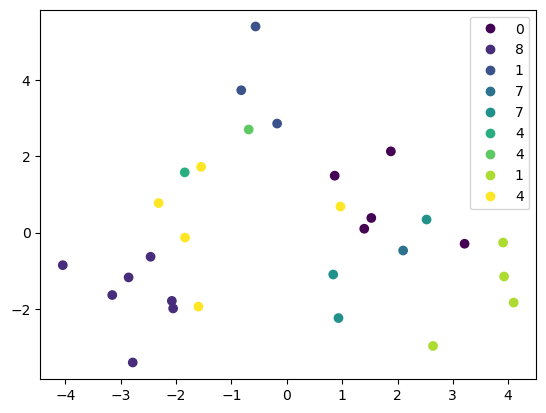

In [27]:
#plot pca
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()

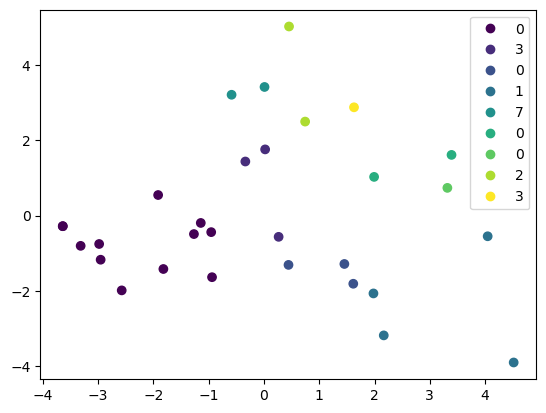

In [28]:
#PCA for light

X = X_light_normalize.drop(columns = 'cluster')
y = X_light_normalize['cluster']
pca = PCA()
Xt = pca.fit_transform(X)

#plot pca
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.show()